In [0]:
import pandas as pd
BHNames=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']

In [0]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace=True, names=BHNames)

print(data.head(20))
print(data.info())

In [0]:
#Sclae data from 0 to 1 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(data))
DataScaled= scaler.fit_transform(data)
DataScaled = pd.DataFrame(DataScaled,columns=BHNames)
Summary= DataScaled.describe()
Summary= Summary.transpose()
print(Summary)

In [0]:
import matplotlib.pyplot as plt
boxplot = DataScaled.boxplot(column=BHNames)
plt.show()

CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

In [0]:
X=DataScaled.drop('medv',axis = 1)
y=DataScaled['medv']

In [0]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics


Using TensorFlow backend.


In [0]:
#Input Layer and first hidden layer  # Sequential() ---> class , model --> object
model = Sequential()
model.add(Dense(20,input_dim=13,activation='relu'))

In [0]:
#Second hidden layer
model.add(Dense(10,activation='relu'))

In [0]:
#output layer
model.add(Dense(1,activation='linear'))

In [0]:
#complie ANN
model.compile(optimizer="Adam",loss='mean_squared_error',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train, epochs=1000, verbose=1)

Epoch 1/1000
404/404 [==============================] - 0s 248us/step - loss: 0.0509 - accuracy: 0.0074
Epoch 2/1000
404/404 [==============================] - 0s 42us/step - loss: 0.0327 - accuracy: 0.0149
Epoch 3/1000
404/404 [==============================] - 0s 40us/step - loss: 0.0233 - accuracy: 0.0223
Epoch 4/1000
404/404 [==============================] - 0s 40us/step - loss: 0.0187 - accuracy: 0.0272
Epoch 5/1000
404/404 [==============================] - 0s 44us/step - loss: 0.0159 - accuracy: 0.0272
Epoch 6/1000
404/404 [==============================] - 0s 38us/step - loss: 0.0141 - accuracy: 0.0272
Epoch 7/1000
404/404 [==============================] - 0s 40us/step - loss: 0.0130 - accuracy: 0.0297
Epoch 8/1000
404/404 [==============================] - 0s 38us/step - loss: 0.0120 - accuracy: 0.0322
Epoch 9/1000
404/404 [==============================] - 0s 40us/step - loss: 0.0110 - accuracy: 0.0322
Epoch 10/1000
404/404 [==============================] - 0s 38us/step - 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [16]:
y_pred=model.predict(x_test)
score=model.evaluate(x_test,y_test,verbose=0)
print(score[0])

0.009512467780059167


In [0]:
# Linear Regression
from sklearn.linear_model import LinearRegression
LM=LinearRegression()
LM.fit(X_train,y_train)
y_predLM=LM.predict(x_test)

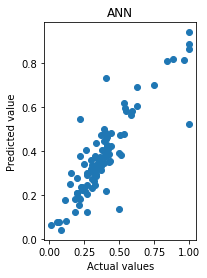

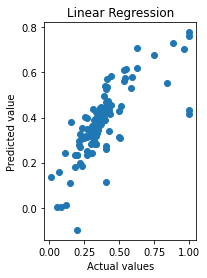

In [23]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(1)
plt.subplot(121)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted value")
plt.title("ANN")
plt.show()

#plt.figure(2)
plt.subplot(122)
plt.scatter(y_test,y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted value")
plt.title("Linear Regression")
plt.show()



In [25]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predLM)
print(mse)

0.016518014813667443
